In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
from functions import *
path = '/Users/yujiaxie/Desktop/Capstone/'
path

'/Users/yujiaxie/Desktop/Capstone/'

In [159]:
household_df = pd.read_csv(path+"household/household_data_1min_singleindex.csv",parse_dates=['utc_timestamp'])
timeseries_df = pd.read_csv(path+"timeseries/time_series_15min_singleindex.csv",parse_dates=['utc_timestamp','cet_cest_timestamp'])
weather_df = pd.read_csv(path+"weather/weather_data.csv",parse_dates=['utc_timestamp'])

In [160]:
household, timeseries, weather = preproc(household_df, timeseries_df, weather_df)

@0.949s taken for {preproc}


In [161]:
householdL, cum_householdL = clean_data(household)

@64.460s taken for {clean_data}


In [162]:
householdL[0]

,day,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,export_consumption_sum,import_generation_sum
0,2016-01-02,328.500,4.920,3.540,0.0,336.960
1,2016-01-03,427.000,4.150,2.990,0.0,434.140
2,2016-01-04,642.000,4.840,3.900,0.0,650.740
3,2016-01-05,673.500,6.290,5.260,0.0,685.050
4,2016-01-06,669.625,2.360,1.490,0.0,673.475
...,...,...,...,...,...,...
418,2017-02-23,703.141,16.030,11.319,0.0,730.490
419,2017-02-24,650.046,10.371,7.951,0.0,668.368
420,2017-02-25,363.235,19.070,13.180,0.0,395.485
421,2017-02-26,466.922,12.739,8.659,0.0,488.320


In [178]:
cum_householdL[0]

,day,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,export_consumption_sum,import_generation_sum
0,2016-01-02,18491.250,363.890,243.605,0.0,19098.745
1,2016-01-03,18918.250,368.040,246.595,0.0,19532.885
2,2016-01-04,19560.250,372.880,250.495,0.0,20183.625
3,2016-01-05,20233.750,379.170,255.755,0.0,20868.675
4,2016-01-06,20903.375,381.530,257.245,0.0,21542.150
...,...,...,...,...,...,...
418,2017-02-23,292194.227,5609.262,4417.783,0.0,302221.272
419,2017-02-24,292844.273,5619.633,4425.734,0.0,302889.640
420,2017-02-25,293207.508,5638.703,4438.914,0.0,303285.125
421,2017-02-26,293674.430,5651.442,4447.573,0.0,303773.445


In [204]:
t = timeseries.copy()
t.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_LU_load_actual_entsoe_transparency',
       'DE_LU_load_forecast_entsoe_transparency',
       'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual',
       'DE_LU_wind_offshore_g

In [287]:
t = t[(t.utc_timestamp > '2016-01-02') & (t.utc_timestamp < '2017-02-28')] # same time interval as household
tmp = [c for c in t.columns if 'LU' not in c and 'amprion' not in c and 'transnetbw' not in c and 'tennet' not in c and '50hertz' not in c and 'profile' not in c and 'entsoe' not in c and 'offshore' not in c and 'onshore' not in c]
t = t[tmp] # exclude DE-LU (bidding zone) and control areas
#t = t[['DE_solar_capacity', 'DE_wind_capacity','DE_wind_offshore_capacity','DE_wind_onshore_capacity']] # only include meaningful features
t['day'] = pd.to_datetime(t.utc_timestamp.apply(lambda x: x.date()))
daily_t = t.groupby('day').mean().reset_index().round(3) # use mean or max?
daily_t

,day,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
0,2016-01-02,38632.000,395.930,32812.000,17161.261
1,2016-01-03,38632.500,563.254,32812.000,16928.938
2,2016-01-04,38644.042,419.986,32812.000,11602.459
3,2016-01-05,38645.083,522.922,32812.208,8602.816
4,2016-01-06,38647.125,524.676,32817.000,6501.709
...,...,...,...,...,...
418,2017-02-23,40267.208,2113.442,37761.958,29391.878
419,2017-02-24,40272.000,2939.350,37784.375,21754.423
420,2017-02-25,40272.000,4065.816,37793.000,17240.361
421,2017-02-26,40272.208,2476.957,37794.458,22714.318


In [239]:
cum_daily_t = daily_t.loc[:, daily_t.columns!='day'].cumsum(axis = 0).round(2)
cum_daily_t.insert(0, 'day', pd.date_range(start='2016-01-02', end='2017-02-27'))
cum_daily_t

,day,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
0,2016-01-02,38632.00,395.93,32812.00,17161.26
1,2016-01-03,77264.50,959.18,65624.00,34090.20
2,2016-01-04,115908.54,1379.17,98436.00,45692.66
3,2016-01-05,154553.62,1902.09,131248.21,54295.47
4,2016-01-06,193200.75,2426.77,164065.21,60797.18
...,...,...,...,...,...
418,2017-02-23,16445183.34,1512557.64,14669819.29,3826813.03
419,2017-02-24,16485455.34,1515496.99,14707603.67,3848567.46
420,2017-02-25,16525727.34,1519562.80,14745396.67,3865807.82
421,2017-02-26,16565999.55,1522039.76,14783191.13,3888522.14


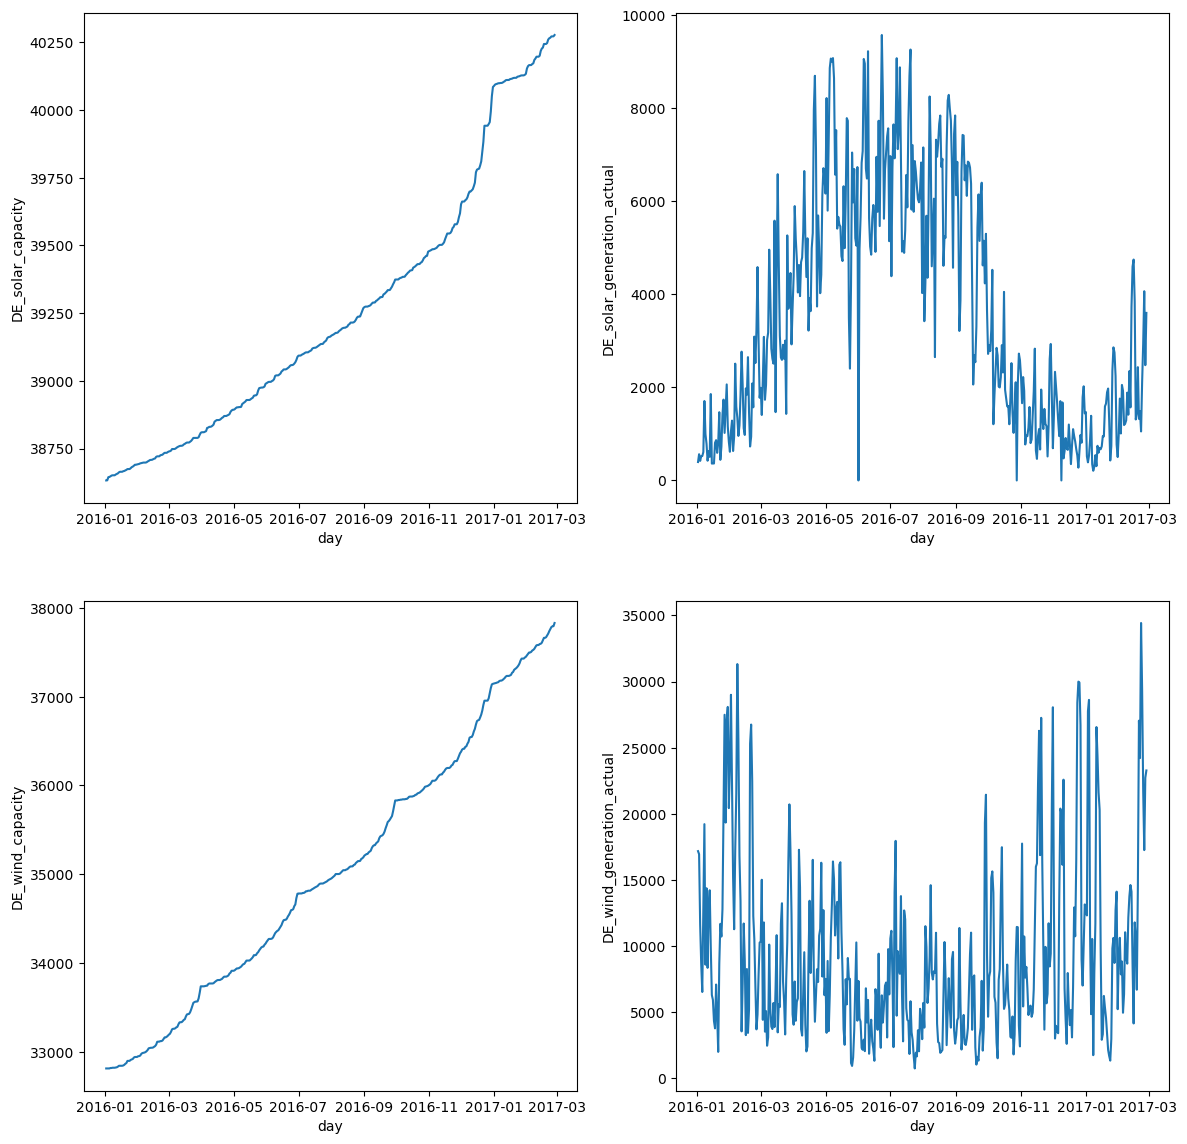

In [243]:
metric_names = [c for c in daily_t.columns if c != 'day']

fig, ax = plt.subplots(2,2, figsize=(14,14))
for c, subplot in zip(metric_names[:], ax.flatten()):
    sns.lineplot(data=daily_t, x='day', y=c, ax=subplot);

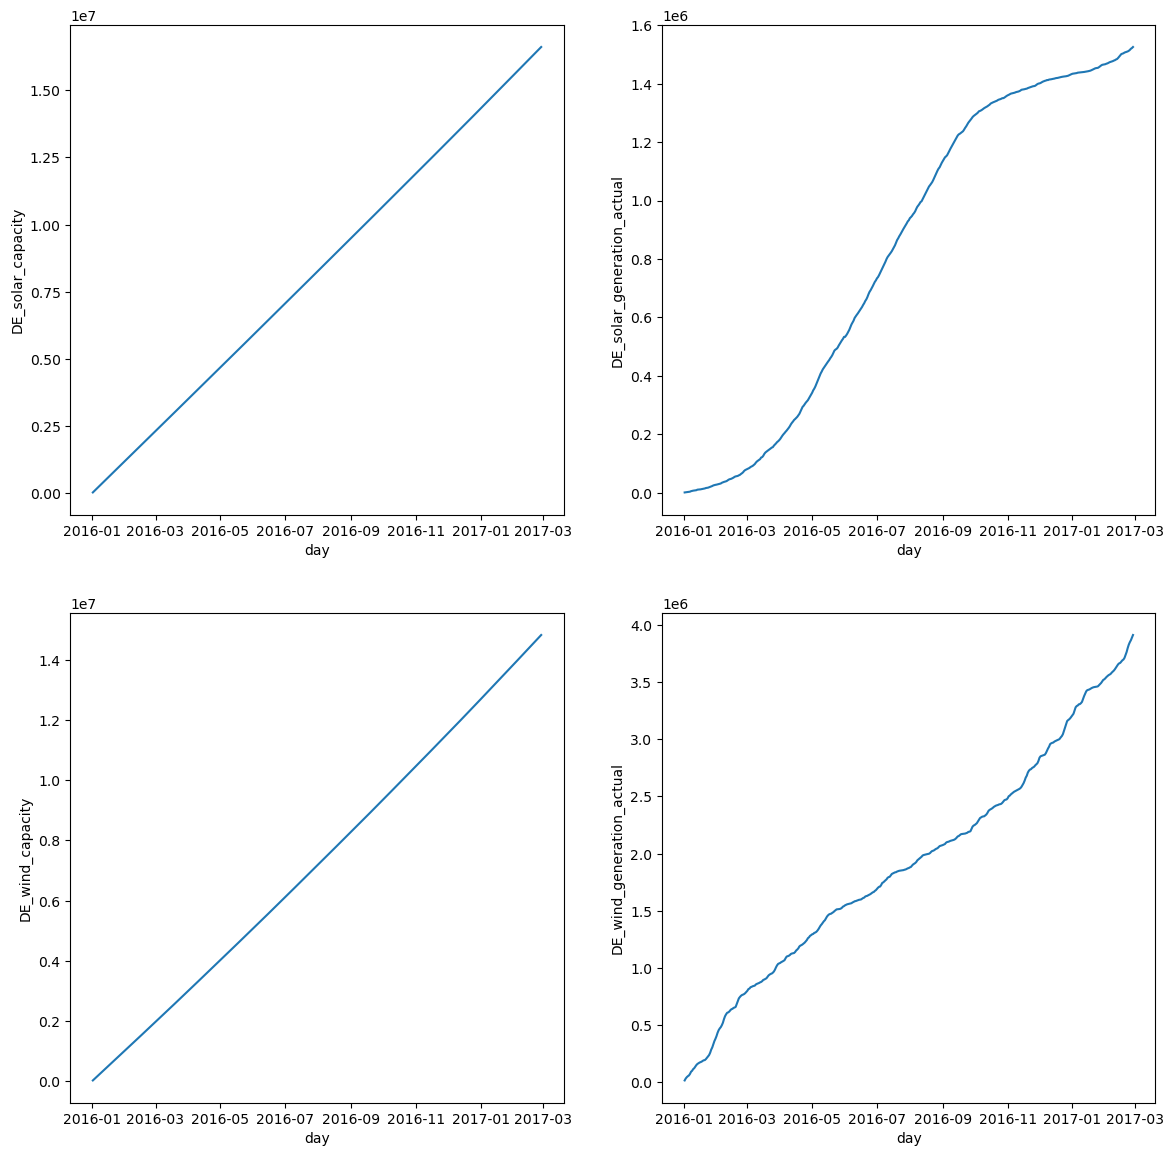

In [245]:
metric_names = [c for c in daily_t.columns if c != 'day']

fig, ax = plt.subplots(2,2, figsize=(14,14))
for c, subplot in zip(metric_names[:], ax.flatten()):
    sns.lineplot(data=cum_daily_t, x='day', y=c, ax=subplot);

In [246]:
# sns.lineplot(data=daily_t, x='day', y='DE_amprion_load_actual_entsoe_transparency');

In [247]:
def plot_line(df, metrics, include):
    metrics = [c for c in metrics if include in c]
    date = df["day"]
    cm = plt.get_cmap('gist_rainbow')
    if len(metrics) == 0:
        return
    fig, ax = plt.subplots(figsize=(20, 10))
    color_map = [cm(1.*i/len(metrics)) for i in range(len(metrics))]
    for i,c in enumerate(metrics):
        value = df[c]
        ax.plot(date, value, color = color_map[i], label = c)
    #ax.set_title("{} summary".format(df.name), fontsize = 15)
    ax.set_xlabel("timestamp", fontsize = 10)
    ax.set_ylabel("kWh", fontsize = 10)
    ax.legend(loc="upper left")
    plt.show()
    

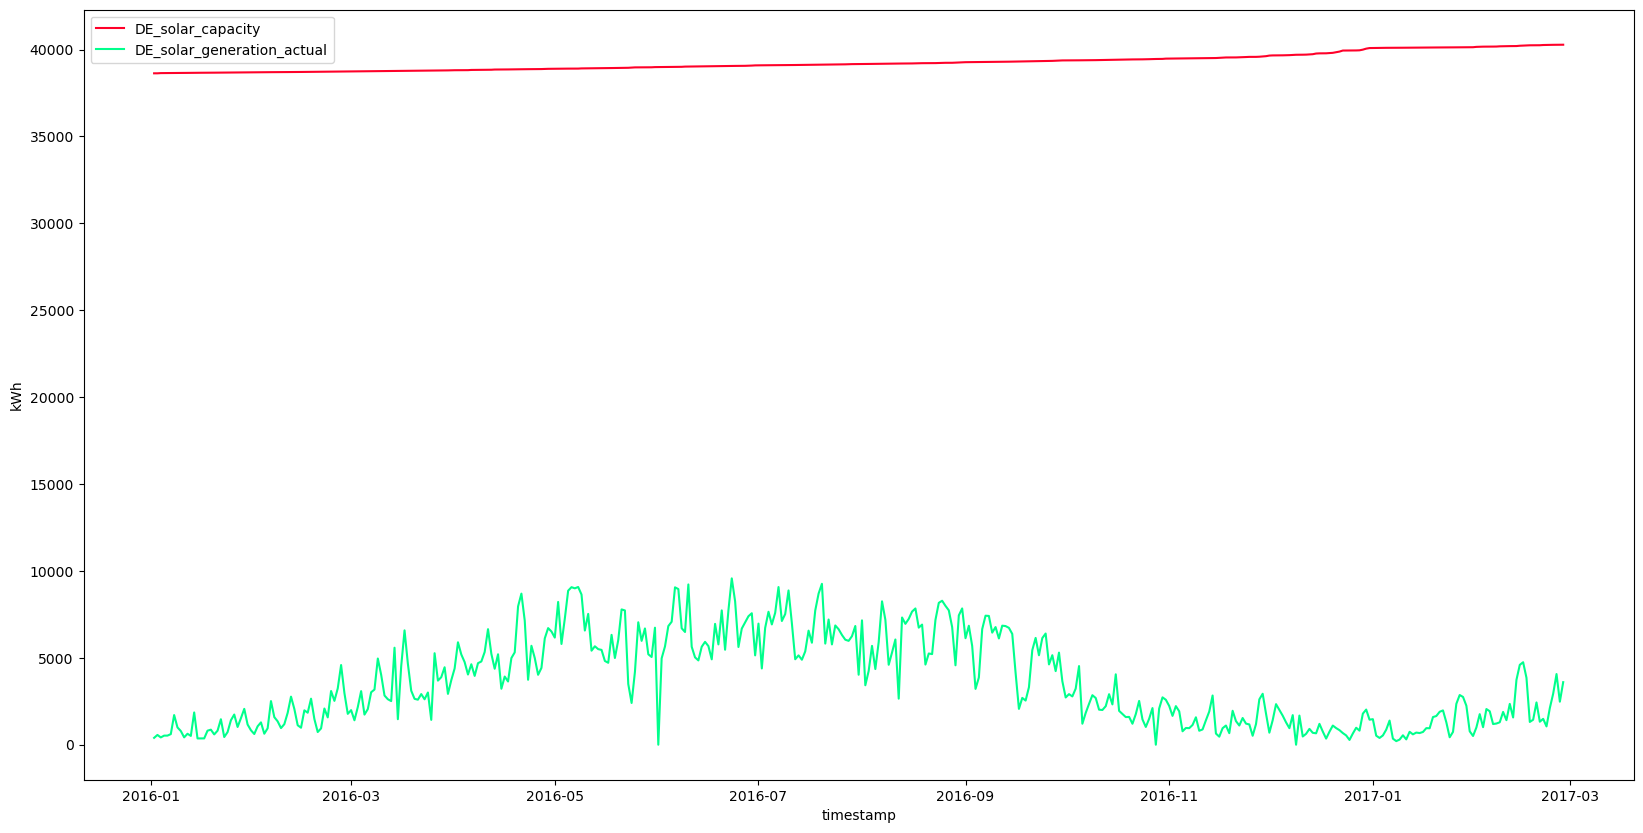

In [248]:
plot_line(daily_t, metric_names, 'solar', )

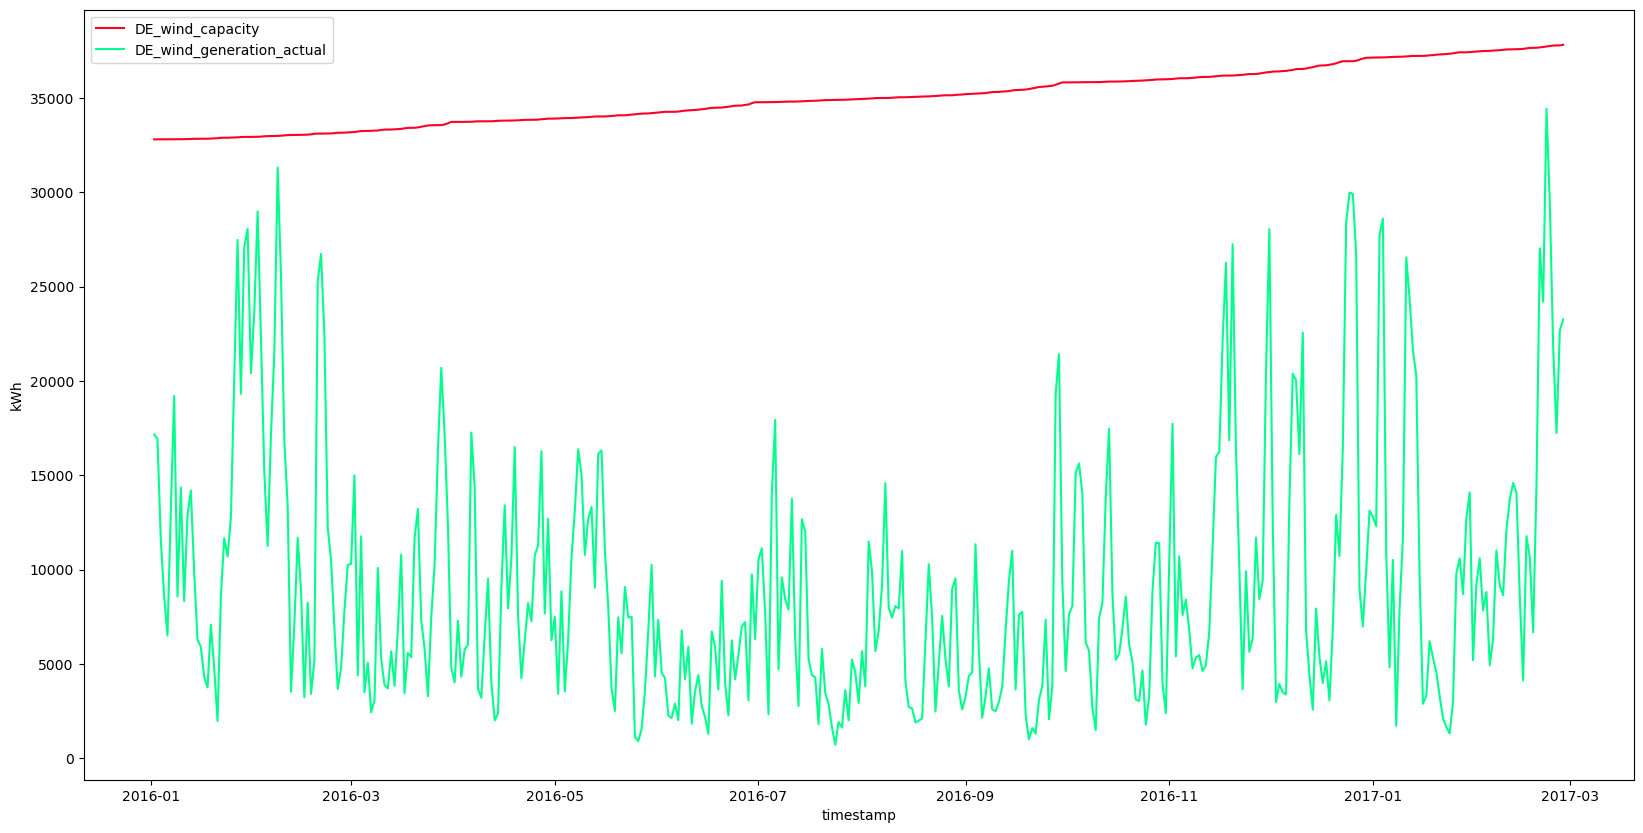

In [273]:
plot_line(daily_t, metric_names, 'wind')

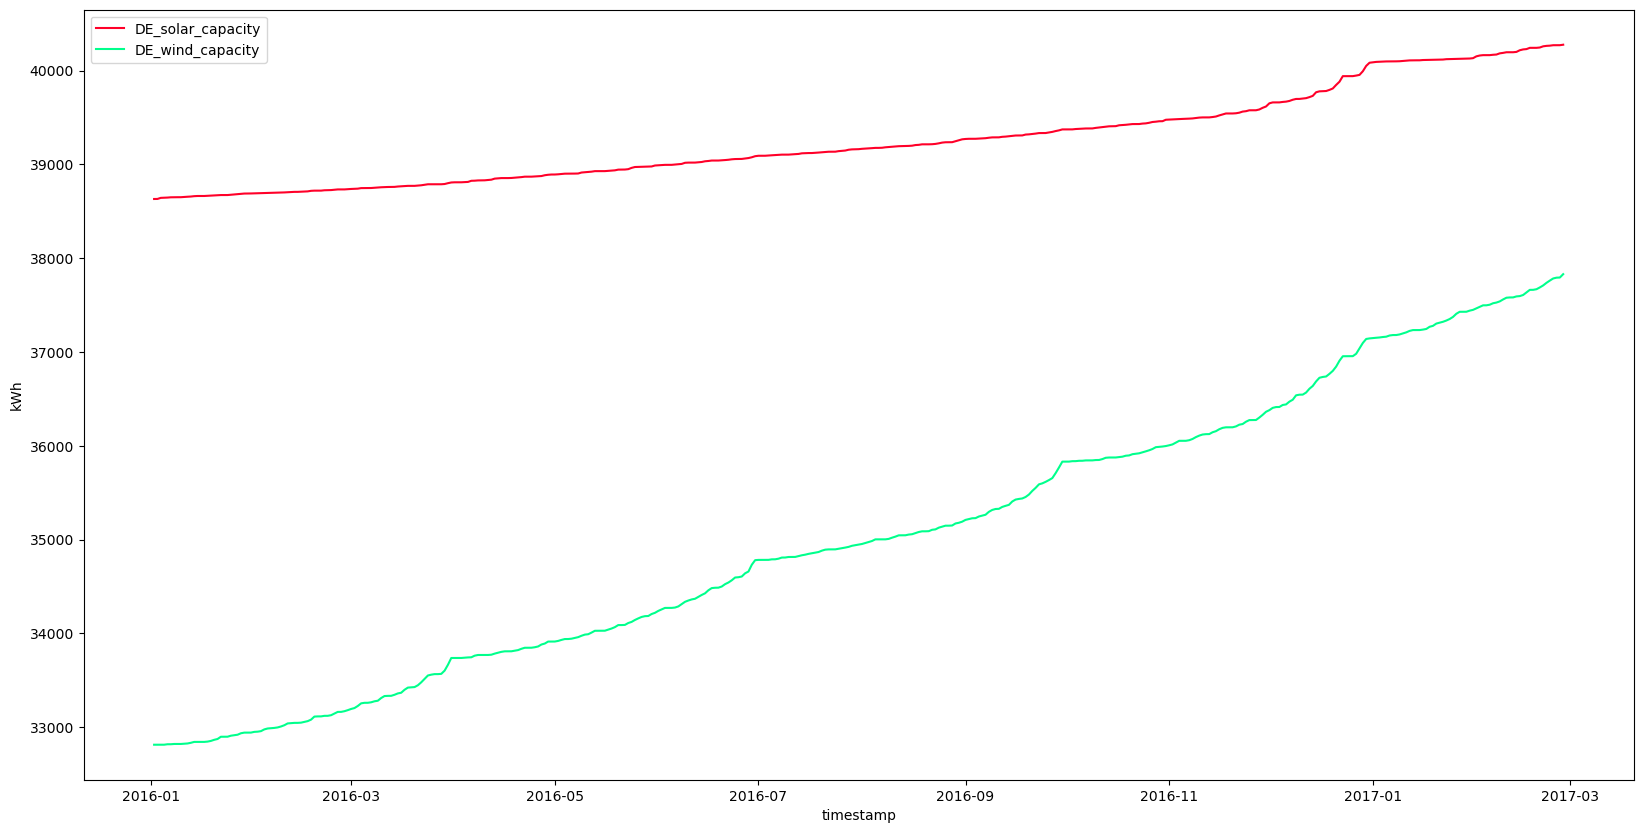

In [274]:
plot_line(daily_t, metric_names, 'capacity')

# Relation between wind/solar capacity and import/export/consumption/generation

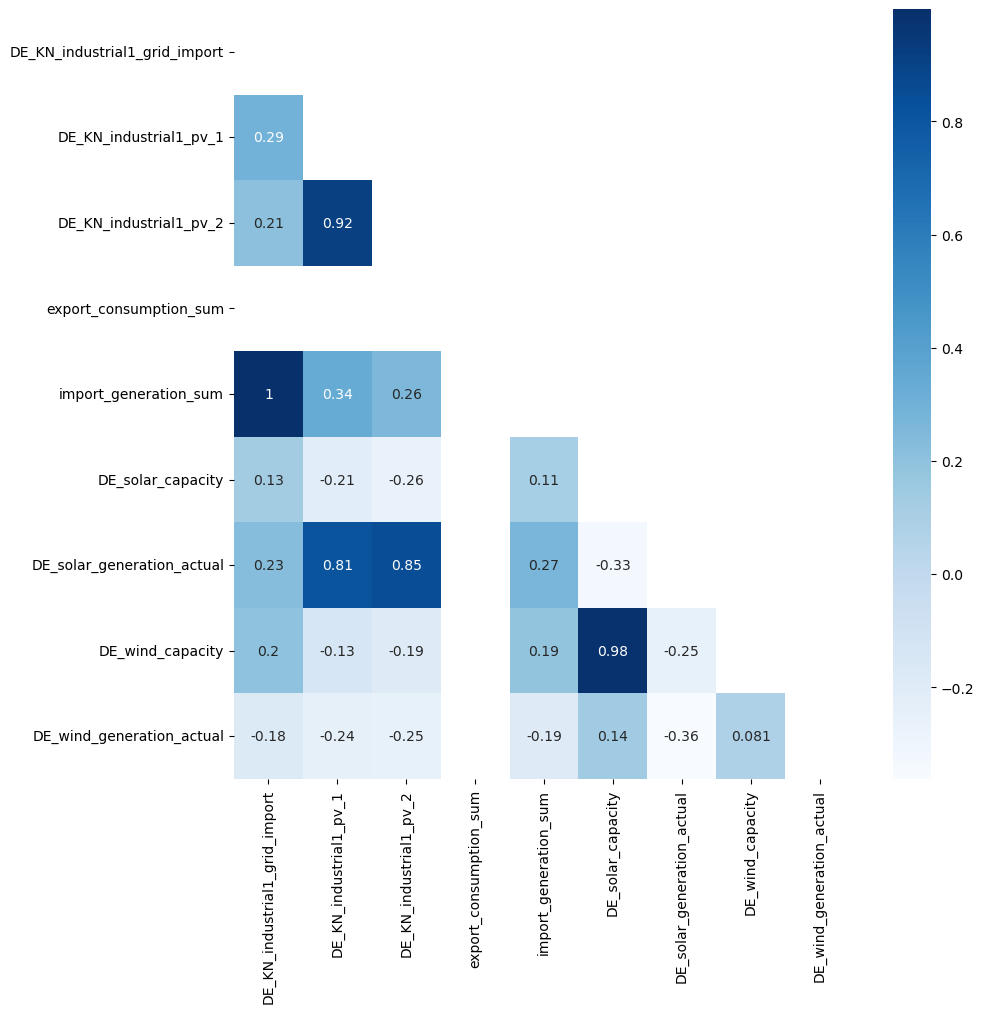

In [276]:
corr = householdL[0].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

For industrial1: `solar generation actual` is highly correlated with `generation`

In [277]:
corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True)).set_precision(2)

,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,export_consumption_sum,import_generation_sum,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
DE_KN_industrial1_grid_import,1.00,0.29,0.21,nan,1.00,0.13,0.23,0.20,-0.18
DE_KN_industrial1_pv_1,0.29,1.00,0.92,nan,0.34,-0.21,0.81,-0.13,-0.24
DE_KN_industrial1_pv_2,0.21,0.92,1.00,nan,0.26,-0.26,0.85,-0.19,-0.25
export_consumption_sum,nan,nan,nan,nan,nan,nan,nan,nan,nan
import_generation_sum,1.00,0.34,0.26,nan,1.00,0.11,0.27,0.19,-0.19
DE_solar_capacity,0.13,-0.21,-0.26,nan,0.11,1.00,-0.33,0.98,0.14
DE_solar_generation_actual,0.23,0.81,0.85,nan,0.27,-0.33,1.00,-0.25,-0.36
DE_wind_capacity,0.20,-0.13,-0.19,nan,0.19,0.98,-0.25,1.00,0.08
DE_wind_generation_actual,-0.18,-0.24,-0.25,nan,-0.19,0.14,-0.36,0.08,1.00


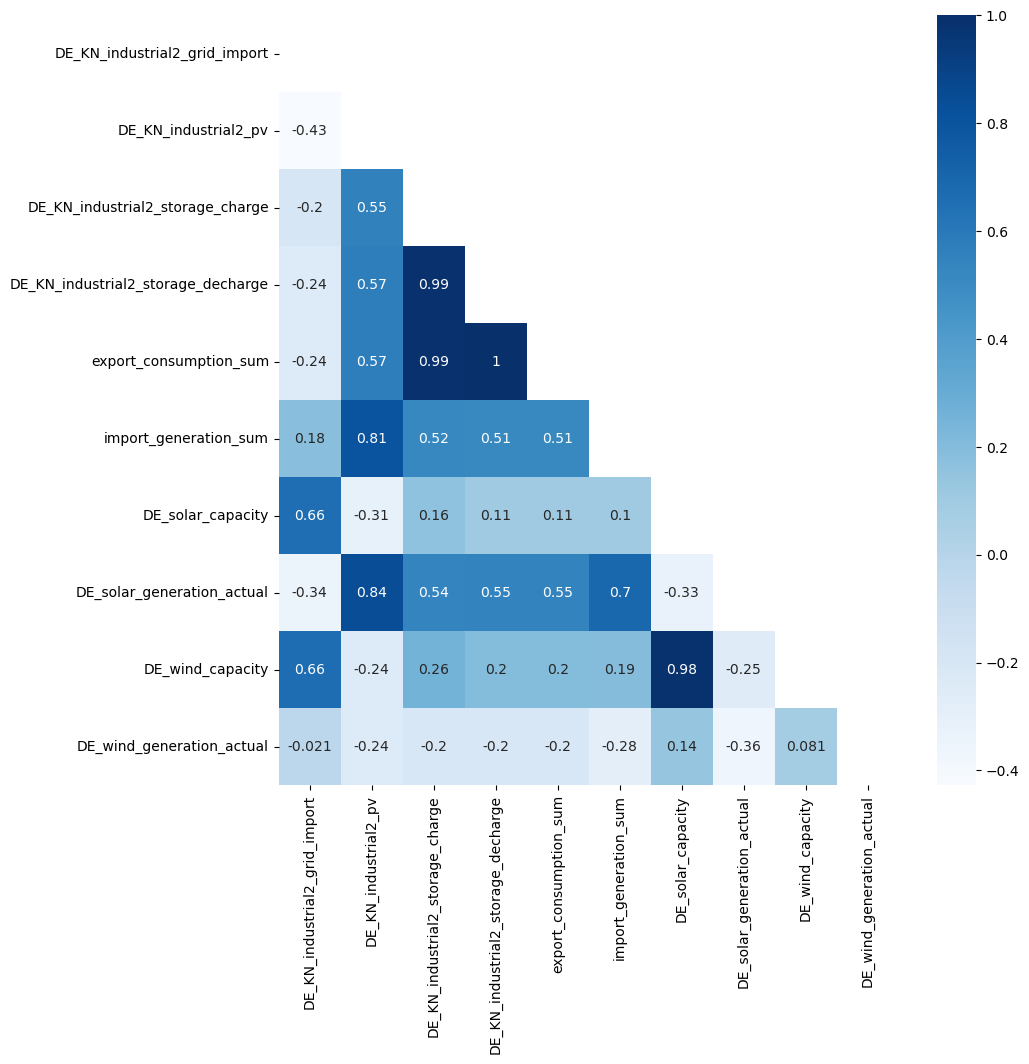

In [278]:
corr = householdL[1].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,
                            dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

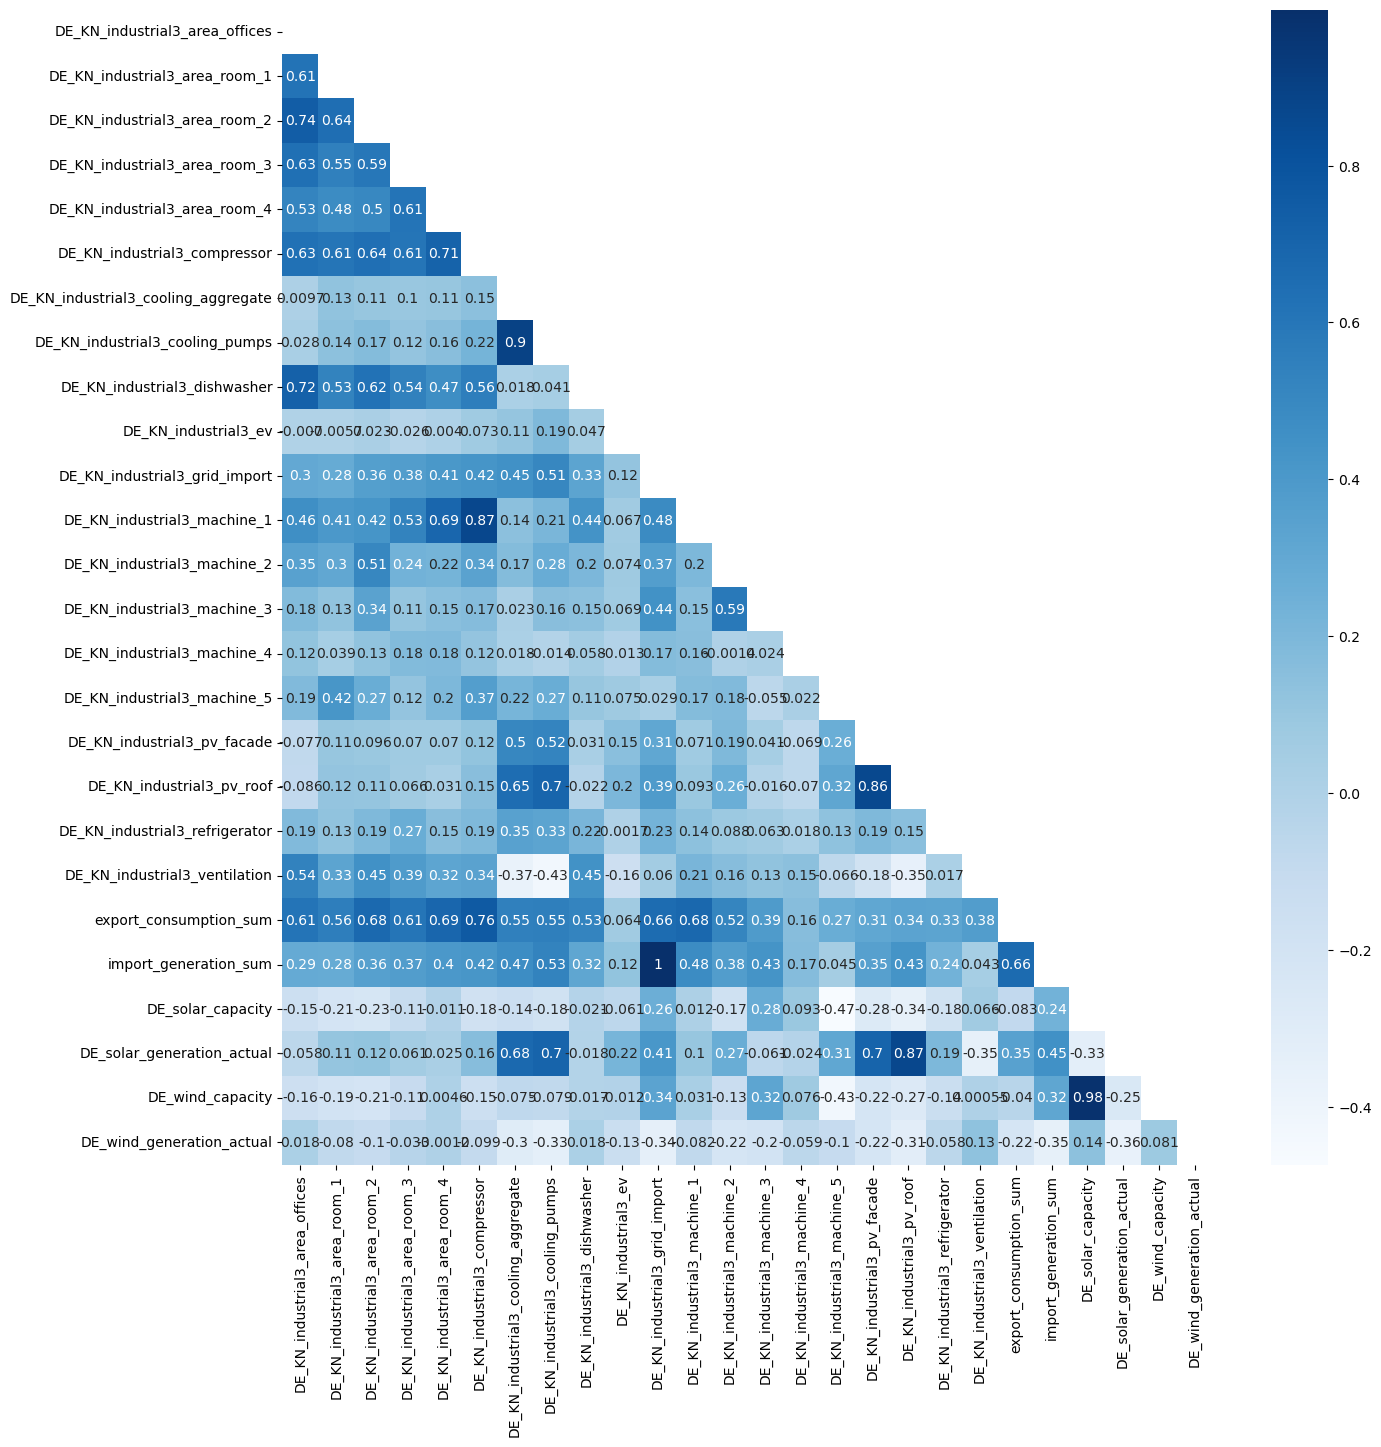

In [280]:
corr = householdL[2].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(15,15));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

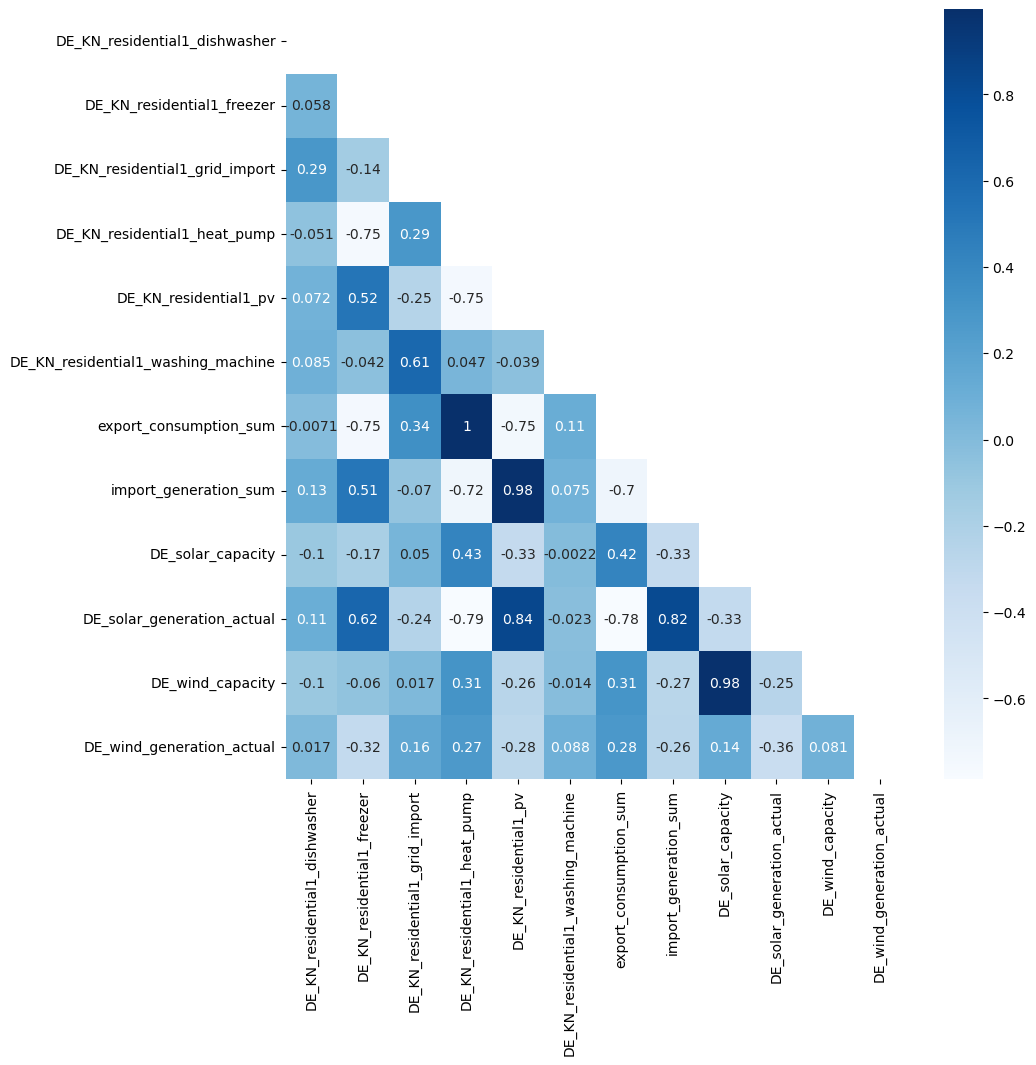

In [281]:
corr = householdL[5].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

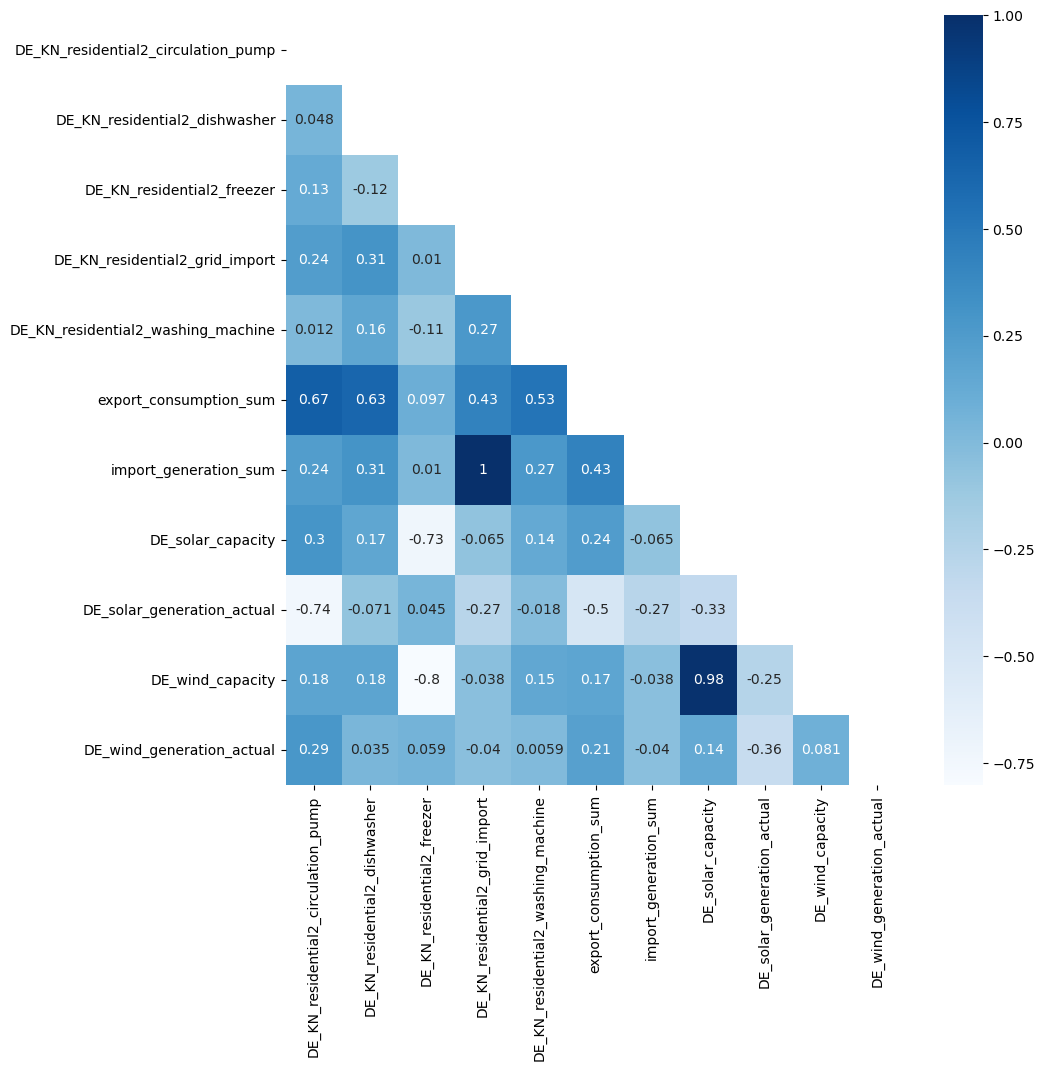

In [282]:
corr = householdL[6].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

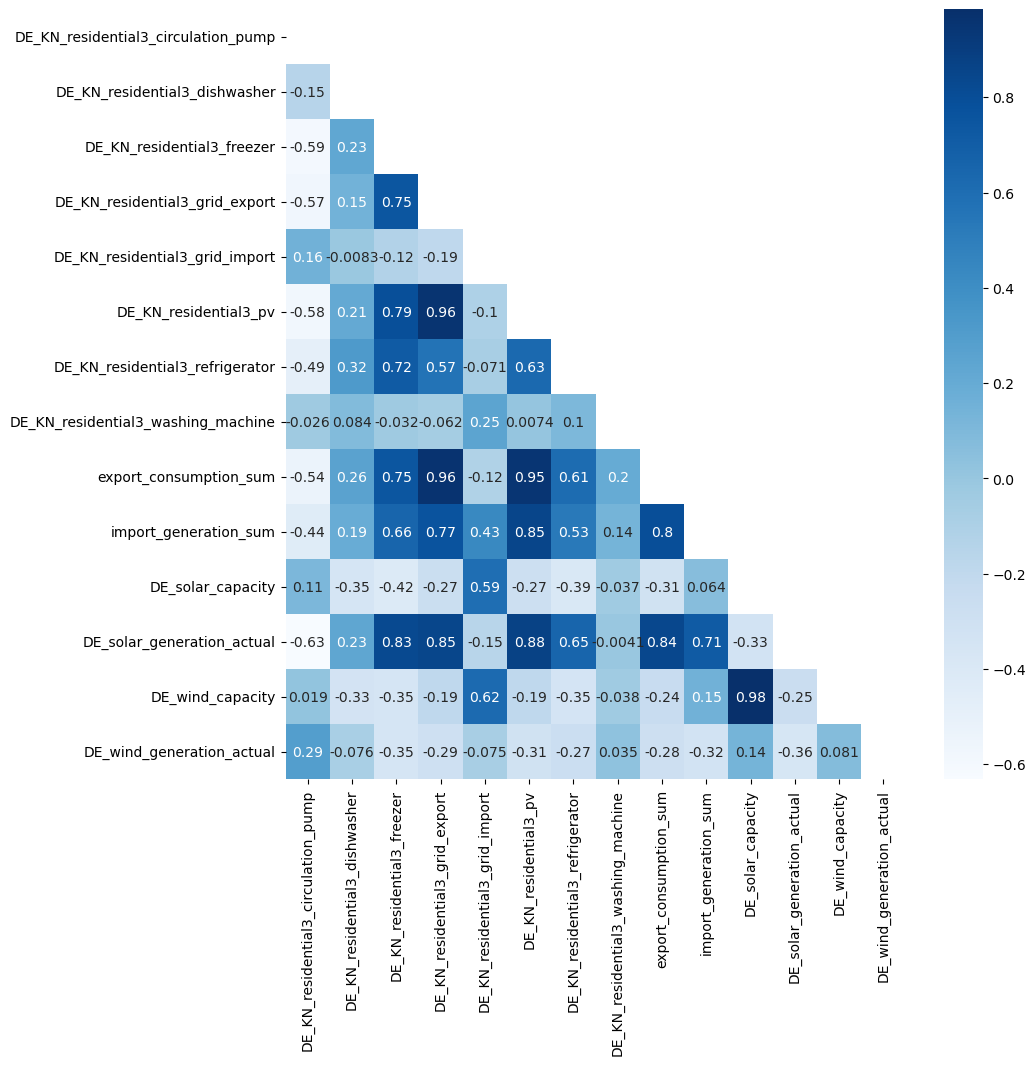

In [283]:
corr = householdL[7].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

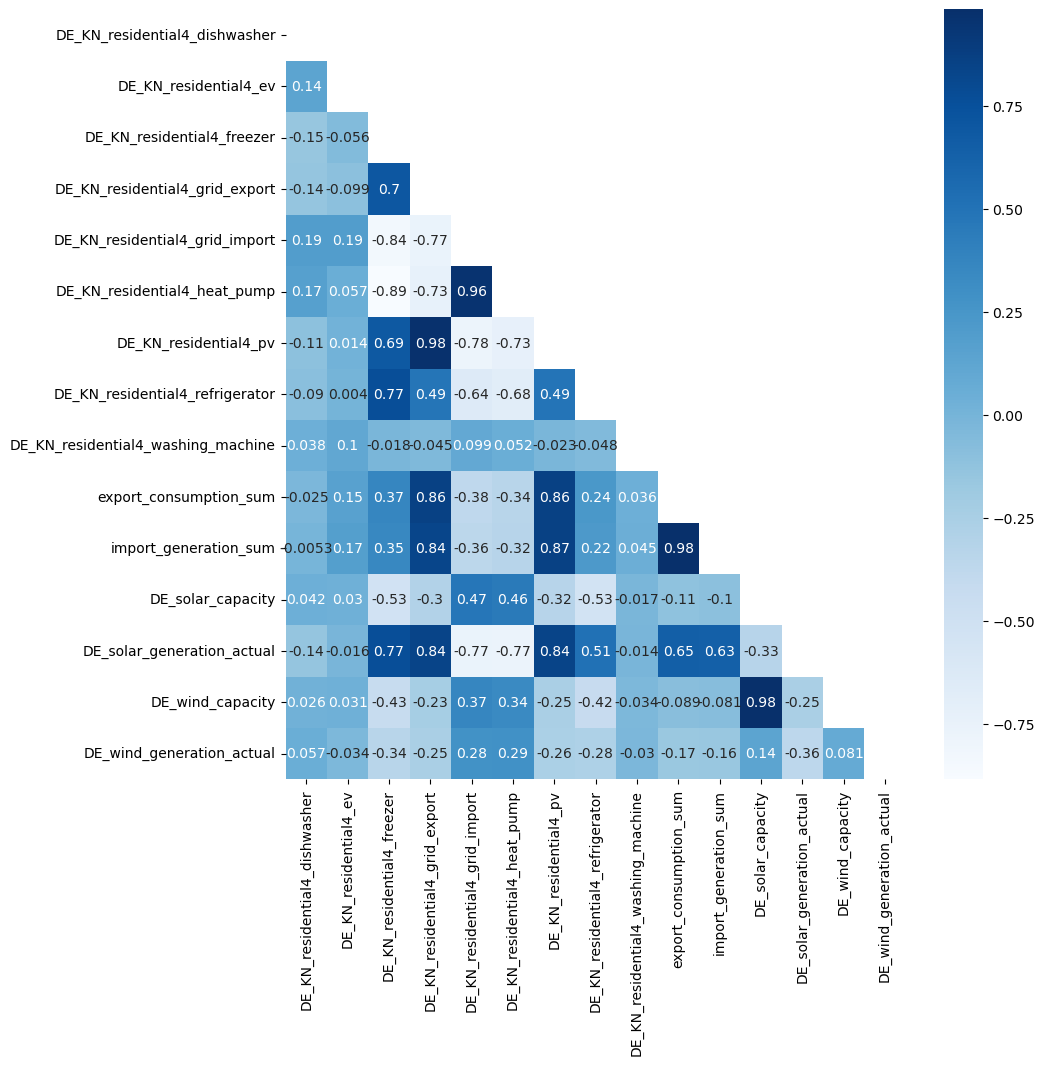

In [284]:
corr = householdL[8].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

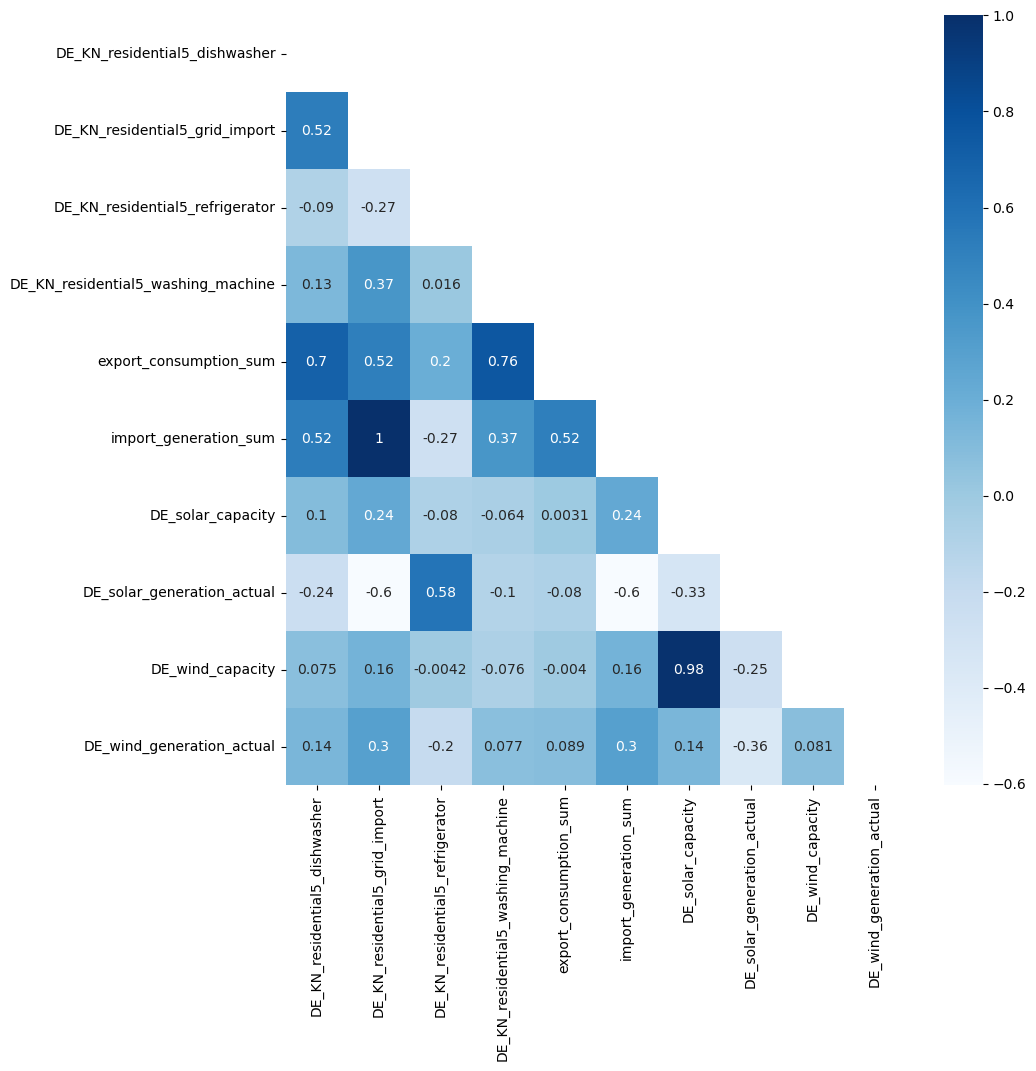

In [285]:
corr = householdL[9].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);

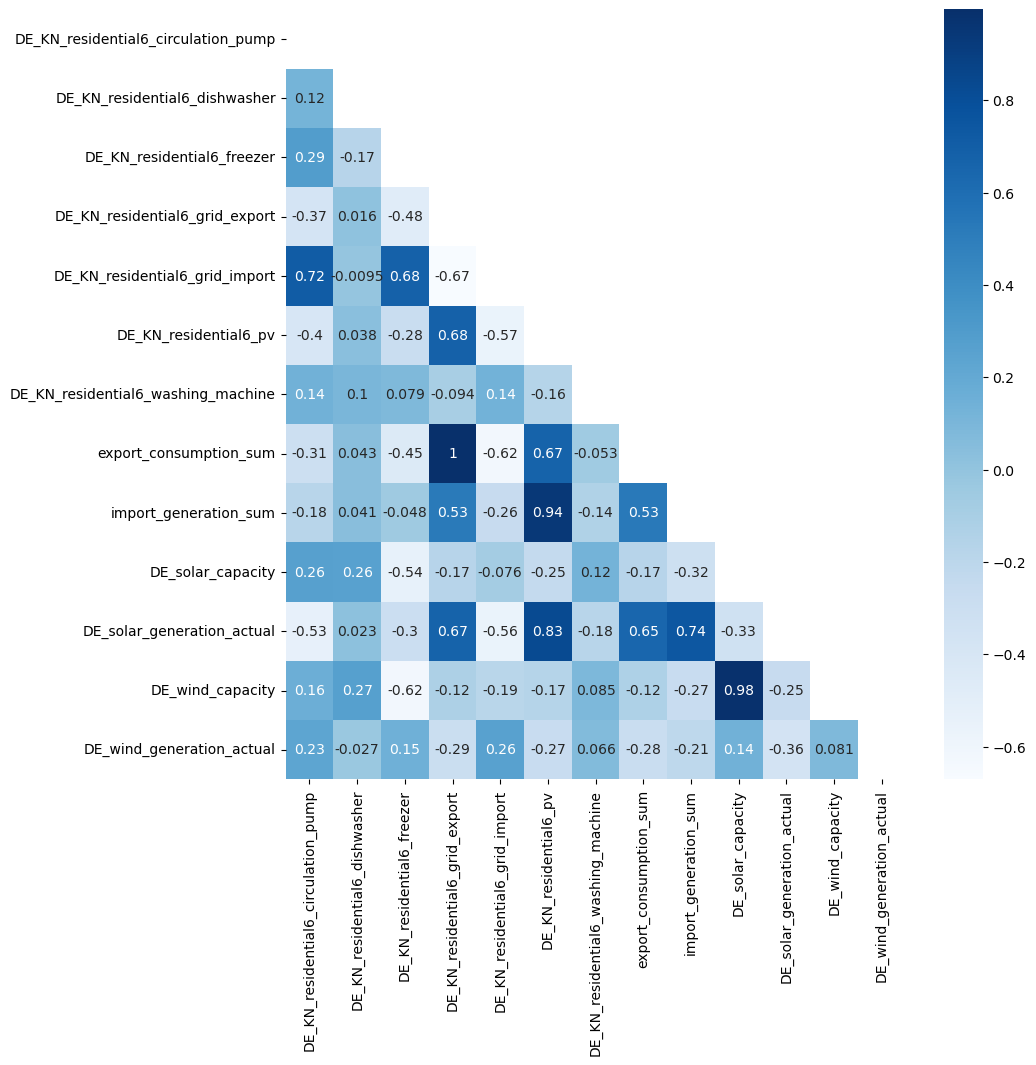

In [286]:
corr = householdL[10].set_index('day').join(daily_t.set_index('day')).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig,ax = plt.subplots(1,1, figsize=(10,10));
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True);